# Lecture 1 - 게이트와 양자 회로
# 1-1 다중 큐비트 상태와 다중 큐비트 게이트
## 1. 다중 큐비트 상태
한개의 큐비트가 두가지의 상태를 나타낼 수 있는것처럼 두개의 큐비트는 아래와 같이 4가지의 상태를 나타낼 수 있습니다. 따라서 n개의 큐비트가 있다면 $2^n$가지의 상태를 나타낼 수 있습니다.

```00 01 10 11```

우선 두개의 큐비트를 설명하려면 4개의 복소 진폭(complex amplitude)가 필요합ㄴ디ㅏ. 이러한 진폭들은 4차원의 벡터에 아래와 같이 표현할 수 있습니다.

$$ |a\rangle = a_{00}|00\rangle + a_{01}|01\rangle + a_{10}|10\rangle + a_{11}|11\rangle = \begin{bmatrix} a_{00} \\
a_{01} \\ a_{10} \\ a_{11} \end{bmatrix} $$

만약 두개의 큐비트가 분리되서 표현이 되었을때 이 두개의 큐비트를 크로네커 곱(kronecker product)을 사용하여 표현할 수 있습니다.

$$ |a\rangle = \begin{bmatrix} a_o \\ a_1 \end{bmatrix} \quad |b\rangle = \begin{bmatrix} b_0 \\ b_1 \end{bmatrix} $$

$$ |ba\rangle = |b\rangle \otimes |a\rangle = \begin{bmatrix} b_0 \times \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} \\
b_1 \times \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} \end{bmatrix} = \begin{bmatrix} b_0a_0 \\ b_0a_1 \\ b_1a_0 \\ b_1a_1 \end{bmatrix} $$

위의 표현과 같이 크로네커 곱을 이용하여 여러개의 큐비트를 표현할 수 있습니다. 아래는 3개의 큐비트를 설명하는 벡터입니다.

$$ |cba\rangle = \begin{bmatrix} c_0b_0a_0 \\ c_0b_0a_1 \\ c_0b_1a_0 \\ c_0b_1a_1 \\ c_1b_0a_0 \\ c_1b_0a_1 \\ c_1b_1a_0 \\ c_1b_1a_1 \end{bmatrix} $$

다중 큐비트의 상태를 표현할때 Qiskit에서는 아래와 같이 표현합니다

$$|MSB \cdots LSB\rangle, \quad i.e. \quad |q5,q4,q3,q2,q1,q0\rangle, \quad |q2,q1,q0\rangle $$

MSB = Most Significant Bit

LSB = Least Significant Bit


이번 장에서 다중 게이트의 사용과 다중 큐비트의 양자 회로을 output으로부터 개념을 이해해봅시다. 

게이트와 양자회로를 그리기 위해 Python 라이브러리인 Qiskit을 불러오겠습니다

In [1]:
from qiskit import * #qiskit 전체 라이브러리 불러오기
from qiskit.providers.aer import StatevectorSimulator #StatevectorSimulator를 사용하여 양자회로의 최종 양자 statevector을 구할수 있음

from math import pi, sqrt #math 라이브러리에서 pi와 sqrt 불러오기
from qiskit.visualization import * #양자상태를 시각화 하기 위해 qiskit.visualization 불러오기

### 예제 1 - 0번 큐비트에 $X$ 게이트 추가하기

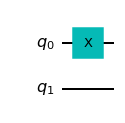

In [2]:
qc=QuantumCircuit(2) #2개의 qubit을 가진 양자 회로 만들기
qc.x(0) #0번 큐비트에 X 게이트 추가
qc.draw(output="mpl") #양자 회로 시각화

In [3]:
state0 = execute(qc, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
state0.draw(output="latex") #시뮬레이션 결과를 latex 형식으로 출력하기

<IPython.core.display.Latex object>

### 예제 2 - 1번 큐비트에 하다마드 게이트 추가하기

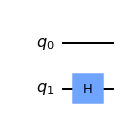

In [4]:
qc=QuantumCircuit(2) #2개의 qubit을 가진 양자 회로 만들기
qc.h(1) #1번 큐비트에 H 게이트 추가
qc.draw(output="mpl") #양자 회로 시각화

In [5]:
state1 = execute(qc, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
state1.draw(output="latex") #시뮬레이션 결과를 latex 형식으로 출력하기

<IPython.core.display.Latex object>

## 2-큐비트 게이트
### 제어 게이트 (Controlled Gates)
### 1. $CX$ 게이트

CX 게이트는 $cx(control, target)$과 같은 문법으로 사용이 되며 control 큐비트의 상태에 따라 target 큐비트의 결과값에 영향을 주는 조건부 게이트입니다. control 큐비트의 상태가 $|1\rangle$이면 target 큐비트에 X-게이트를 실행합니다. 하지만 control 큐비트의 상태가 $|0\rangle$인 경우에는 target 큐비트에 어떠한 변화도 가하지 않습니다.

#### 경우 1: $q0$가 control 큐비트이며 $q1$이 target 큐비트일때

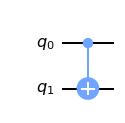

In [6]:
qc=QuantumCircuit(2) #2개의 큐비트를 가진 양자 회로 만들기
qc.cx(0,1) #0번 큐비트에 control 큐비트로 지정하며 1번 큐비트를 target 큐비트로 지정하는 CX 게이트를 추가
qc.draw(output="mpl") #양자 회로 시각화

In [7]:
backend = Aer.get_backend('unitary_simulator') #unitary_simulator를 사용하여 양자회로를 시뮬레이션하기

job = execute(qc, backend) #양자회로를 시뮬레이션하기
result = job.result() #시뮬레이션 결과를 가져오기
print(result.get_unitary(qc, decimals=3)) #시뮬레이션 결과를 출력하기

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


#### 경우 2: $q1$가 control 큐비트이며 $q0$이 target 큐비트일때

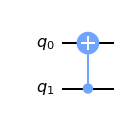

In [8]:
qc=QuantumCircuit(2) #2개의 큐비트를 가진 양자 회로 만들기
qc.cx(1,0) #1번 큐비트에 control 큐비트로 지정하며 0번 큐비트를 target 큐비트로 지정하는 CX 게이트를 추가
qc.draw(output="mpl") #양자 회로 시각화

In [9]:
backend = Aer.get_backend('unitary_simulator') #unitary_simulator를 사용하여 양자회로를 시뮬레이션하기
 
job = execute(qc, backend) #양자회로를 시뮬레이션하기
result = job.result() #시뮬레이션 결과를 가져오기
print(result.get_unitary(qc, decimals=3)) #시뮬레이션 결과를 출력하기

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


#### target 큐비트의 상태가 $|0\rangle$일때 $CX$ 게이트의 작동

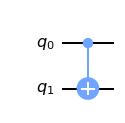

In [10]:
qc=QuantumCircuit(2) #2개의 큐비트를 가진 양자 회로 만들기
qc.cx(0,1) #0번 큐비트에 control 큐비트로 지정하며 1번 큐비트를 target 큐비트로 지정하는 CX 게이트를 추가
qc.draw(output="mpl") #양자 회로 시각화

In [11]:
state2 = execute(qc, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
state2.draw(output="latex") #시뮬레이션 결과를 latex 형식으로 출력하기

<IPython.core.display.Latex object>

###### $|0\rangle$상태의 control 큐비트에 CX-게이트 [Q-sphere]

![cx-gate](./figure/q-sphere_cx-gate.png)

#### target 큐비트의 상태가 $|1\rangle$일때 $CX$ 게이트의 작동

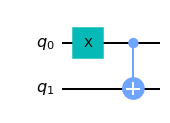

In [12]:
qc=QuantumCircuit(2) #2개의 큐비트를 가진 양자 회로 만들기
qc.x(0) #0번 큐비트에 X 게이트 추가하여 |1> 상태 만들기
qc.cx(0,1) #0번 큐비트에 control 큐비트로 지정하며 1번 큐비트를 target 큐비트로 지정하는 CX 게이트를 추가
qc.draw(output="mpl") #양자 회로 시각화

In [13]:
state3 = execute(qc, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
state3.draw(output="latex") #시뮬레이션 결과를 latex 형식으로 출력하기

<IPython.core.display.Latex object>

###### $|1\rangle$상태의 control 큐비트에 CX-게이트 [Q-sphere]

![cx-gate2](./figure/q-sphere_cx-gate2.png)

#### 수학적 표현

$$ CX_{q_0,q_1} = I \otimes |0\rangle\langle0| + X \otimes |1\rangle\langle1| = \begin{pmatrix} 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \end{pmatrix} $$

$$ CX_{q_1,q_0} = |0\rangle\langle0| \otimes I + |1\rangle\langle1| \otimes X  = \begin{pmatrix} 1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix} $$

이러한 CX 게이트의 특성은 고전 회로의 XOR 게이트와 유사합니다.

### 2. $CY$ 게이트

CY 게이트는 $cy(control, target)$과 같은 문법으로 사용이 되며 control 큐비트의 상태에 따라 target 큐비트의 결과값에 영향을 주는 조건부 게이트입니다. control 큐비트의 상태가 $|1\rangle$이면 target 큐비트에 Y-게이트를 실행합니다. 하지만 control 큐비트의 상태가 $|0\rangle$인 경우에는 target 큐비트에 어떠한 변화도 가하지 않습니다.

#### target 큐비트의 상태가 $|0\rangle$일때 $CY$ 게이트의 작동

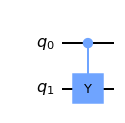

In [14]:
qc=QuantumCircuit(2) #2개의 큐비트를 가진 양자 회로 만들기
qc.cy(0,1) #0번 큐비트에 control 큐비트로 지정하며 1번 큐비트를 target 큐비트로 지정하는 CY 게이트를 추가
qc.draw(output="mpl") #양자 회로 시각화

In [15]:
backend = Aer.get_backend('unitary_simulator') #unitary_simulator를 사용하여 양자회로를 시뮬레이션하기

job = execute(qc, backend) #양자회로를 시뮬레이션하기
result = job.result() #시뮬레이션 결과를 가져오기
print(result.get_unitary(qc, decimals=3)) #시뮬레이션 결과를 출력하기

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.-0.j, 0.-0.j, 0.-0.j, 0.-1.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [16]:
state4 = execute(qc, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
state4.draw(output="latex") #시뮬레이션 결과를 latex 형식으로 출력하기

<IPython.core.display.Latex object>

###### $|0\rangle$상태의 control 큐비트에 CY-게이트 [Q-sphere]

![cy-gate](./figure/q-sphere_cy-gate.png)

#### target 큐비트의 상태가 $|1\rangle$일때 $CY$ 게이트의 작동

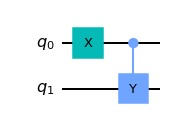

In [17]:
qc=QuantumCircuit(2) #2개의 큐비트를 가진 양자 회로 만들기
qc.x(0) #0번 큐비트에 X 게이트 추가하여 |1> 상태 만들기
qc.cy(0,1) #0번 큐비트에 control 큐비트로 지정하며 1번 큐비트를 target 큐비트로 지정하는 CY 게이트를 추가
qc.draw(output="mpl") #양자 회로 시각화

In [18]:
state5 = execute(qc, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
state5.draw(output="latex") #시뮬레이션 결과를 latex 형식으로 출력하기

<IPython.core.display.Latex object>

###### $|1\rangle$상태의 control 큐비트에 CY-게이트 [Q-sphere]

![cy-gate2](./figure/q-sphere_cy-gate2.png)

#### 수학적 표현

$$ CY_{q_0,q_1} = I \otimes |0\rangle\langle0| + Y \otimes |1\rangle\langle1| = \begin{pmatrix} 1 & 0 & 0 & 0 \\
0 & 0 & 0 & -i \\ 0 & 0 & 1 & 0 \\ 0 & i & 0 & 0 \end{pmatrix} $$

$$ CY_{q_1,q_0} = |0\rangle\langle0| \otimes I + |1\rangle\langle1| \otimes Y  = \begin{pmatrix} 1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\ 0 & 0 & 0 & -i \\ 0 & 0 & i & 0 \end{pmatrix} $$


### 3. $CZ$ 게이트

CZ 게이트는 $cz(control, target)$과 같은 문법으로 사용이 되며 control 큐비트의 상태에 따라 target 큐비트의 결과값에 영향을 주는 조건부 게이트입니다. control 큐비트의 상태가 $|1\rangle$이면 target 큐비트에 Z-게이트를 실행합니다. 하지만 control 큐비트의 상태가 $|0\rangle$인 경우에는 target 큐비트에 어떠한 변화도 가하지 않습니다.

CZ 게이트는 대칭적인(symmetric) 게이트이며 사실상 control과 target이 구분되지 않습니다. 대칭적인 게이트이기 때문에 control과 target을 서로 바꿔서 입력하여도 같은 결과를 출력합니다.

#### target 큐비트의 상태가 $|0\rangle$일때 $CZ$ 게이트의 작동

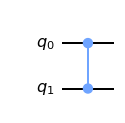

In [19]:
qc=QuantumCircuit(2) #2개의 큐비트를 가진 양자 회로 만들기
qc.cz(0,1) #0번 큐비트에 control 큐비트로 지정하며 1번 큐비트를 target 큐비트로 지정하는 CZ 게이트를 추가
qc.draw(output="mpl") #양자 회로 시각화

In [20]:
backend = Aer.get_backend('unitary_simulator') #unitary_simulator를 사용하여 양자회로를 시뮬레이션하기

job = execute(qc, backend) #양자회로를 시뮬레이션하기
result = job.result() #시뮬레이션 결과를 가져오기 
print(result.get_unitary(qc, decimals=3)) #단위 행렬을 출력하기

Operator([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
          [-0.+0.j, -0.+0.j, -0.+0.j, -1.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [21]:
state6 = execute(qc, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
state6.draw(output="latex") #시뮬레이션 결과를 latex 형식으로 출력하기

<IPython.core.display.Latex object>

###### $|0\rangle$상태의 control 큐비트에 CZ-게이트 [Q-sphere]

![cz-gate](./figure/q-sphere_cz-gate.png)

#### target 큐비트의 상태가 $|1\rangle$일때 $CZ$ 게이트의 작동

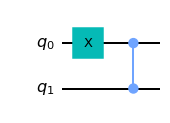

In [22]:
qc=QuantumCircuit(2) #2개의 큐비트를 가진 양자 회로 만들기
qc.x(0) #0번 큐비트에 X 게이트 추가하여 |1> 상태 만들기
qc.cz(0,1) #0번 큐비트에 control 큐비트로 지정하며 1번 큐비트를 target 큐비트로 지정하는 CZ 게이트를 추가
qc.draw(output="mpl") #양자 회로 시각화

In [23]:
state7 = execute(qc, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
state7.draw(output="latex") #시뮬레이션 결과를 latex 형식으로 출력하기

<IPython.core.display.Latex object>

###### $|1\rangle$상태의 control 큐비트에 CZ-게이트 [Q-sphere]

![cz-gate2](./figure/q-sphere_cz-gate2.png)

#### control 큐비트와 target 큐비트를 바꾸고 초기 큐비트의 상태가 위와 동일할때 $CZ$ 게이트의 작동

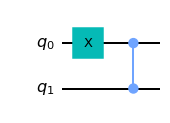

In [24]:
qc=QuantumCircuit(2) #2개의 큐비트를 가진 양자 회로 만들기
qc.x(0) #1번 큐비트에 X 게이트 추가하여 |1> 상태 만들기
qc.cz(1,0) #1번 큐비트에 control 큐비트로 지정하며 0번 큐비트를 target 큐비트로 지정하는 CZ 게이트를 추가
qc.draw(output="mpl") #양자 회로 시각화

In [25]:
state8 = execute(qc, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
state8.draw(output="latex") #시뮬레이션 결과를 latex 형식으로 출력하기

<IPython.core.display.Latex object>

###### control과 target을 바꾸어도 위와 동일한 값을 출력함 [Q-sphere]

![cz-gate3](./figure/q-sphere_cz-gate3.png)

#### control 큐비트와 target 큐비트의 상태가 모두 $|1\rangle$인 상태일때의 $CZ$ 게이트의 작동

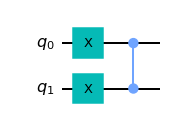

In [26]:
qc=QuantumCircuit(2) #2개의 큐비트를 가진 양자 회로 만들기
qc.x(0) #0번 큐비트에 X 게이트 추가하여 |1> 상태 만들기
qc.x(1) #1번 큐비트에 X 게이트 추가하여 |1> 상태 만들기
qc.cz(0,1) #0번 큐비트에 control 큐비트로 지정하며 1번 큐비트를 target 큐비트로 지정하는 CZ 게이트를 추가
qc.draw(output="mpl") #양자 회로 시각화

In [27]:
state9 = execute(qc, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
state9.draw(output="latex") #시뮬레이션 결과를 latex 형식으로 출력하기

<IPython.core.display.Latex object>

###### $|1\rangle$상태의 control 큐비트와 target 큐비트에 CZ-게이트 [Q-sphere]

![cz-gate4](./figure/q-sphere_cz-gate4.png)

#### 수학적 표현

$$ CZ_{q_1,q_0} = |0\rangle\langle0| \otimes I + |1\rangle\langle1| \otimes Z  = \begin{pmatrix} 1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1 \end{pmatrix} $$

위의 수학적 표현에 따르면 control 큐비트가 $|1\rangle$의 상태일때 게이트의 위상을 뒤집습니다.

### 4. $CH$ 게이트 - 컨트롤 하다마드 게이트

CH 게이트는 $ch(control, target)$과 같은 문법으로 사용이 되며 control 큐비트의 상태에 따라 target 큐비트의 결과값에 영향을 주는 조건부 게이트입니다. control 큐비트의 상태가 $|1\rangle$이면 target 큐비트에 하다마드 게이트를 실행합니다. 하지만 control 큐비트의 상태가 $|0\rangle$인 경우에는 target 큐비트에 어떠한 변화도 가하지 않습니다.

#### target 큐비트의 상태가 $|0\rangle$일때 $CH$ 게이트의 작동

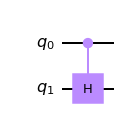

In [28]:
qc=QuantumCircuit(2) #2개의 큐비트를 가진 양자 회로 만들기
qc.ch(0,1) #0번 큐비트에 control 큐비트로 지정하며 1번 큐비트를 target 큐비트로 지정하는 CH 게이트를 추가
qc.draw(output="mpl") #양자 회로 시각화

In [29]:
backend = Aer.get_backend('unitary_simulator') #unitary_simulator를 사용하여 시뮬레이션하기

job = execute(qc, backend) #시뮬레이션 실행
result = job.result() #시뮬레이션 결과 가져오기
print(result.get_unitary(qc, decimals=3)) #단일 행렬 출력하기

Operator([[ 1.   -0.j,  0.   +0.j, -0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.707-0.j,  0.   +0.j,  0.707-0.j],
          [ 0.   +0.j,  0.   +0.j,  1.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.707+0.j,  0.   +0.j, -0.707+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [30]:
state10 = execute(qc, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
state10.draw(output="latex") #시뮬레이션 결과를 latex 형식으로 출력하기

<IPython.core.display.Latex object>

###### $|0\rangle$상태의 control 큐비트에 CH-게이트 [Q-sphere]

![ch-gate](./figure/q-sphere_ch-gate.png)

#### target 큐비트의 상태가 $|1\rangle$일때 $CH$ 게이트의 작동

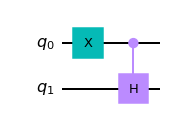

In [31]:
qc=QuantumCircuit(2) #2개의 큐비트를 가진 양자 회로 만들기
qc.x(0) #0번 큐비트에 X 게이트 추가하여 |1> 상태 만들기
qc.ch(0,1) #0번 큐비트에 control 큐비트로 지정하며 1번 큐비트를 target 큐비트로 지정하는 CH 게이트를 추가
qc.draw(output="mpl") #양자 회로 시각화

In [32]:
state11 = execute(qc, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
state11.draw(output="latex") #시뮬레이션 결과를 latex 형식으로 출력하기

<IPython.core.display.Latex object>

###### $|1\rangle$상태의 control 큐비트에 CH-게이트 [Q-sphere]

![ch-gate2](./figure/q-sphere_ch-gate2.png)

#### 수학적 표현

$$ CH_{q_0,q_1} = I \otimes |0\rangle\langle0| + H \otimes |1\rangle\langle1| = \begin{pmatrix} 1 & 0 & 0 & 0 \\
0 & \frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}} \\ 0 & 0 & 1 & 0 \\ 0 & \frac{1}{\sqrt{2}} & 0 & -\frac{1}{\sqrt{2}} \end{pmatrix} $$

$$ CH_{q_1,q_0} = |0\rangle\langle0| \otimes I + |1\rangle\langle1| \otimes H  = \begin{pmatrix} 1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\ 0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ 0 & 0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \end{pmatrix} $$

### 5. $CP$ 게이트 - 컨트롤 위상 게이트

CP 게이트는 $cp(theta, control, target)$과 같은 문법으로 사용이 되며 control 큐비트의 상태에 따라 target 큐비트의 결과값에 영향을 주는 조건부 게이트입니다. control 큐비트의 상태가 $|1\rangle$이면 target 큐비트에 $P$ 게이트를 $theta$ 만큼 실행합니다. 하지만 control 큐비트의 상태가 $|0\rangle$인 경우에는 target 큐비트에 어떠한 변화도 가하지 않습니다.

CP 게이트는 대칭적인(symmetric) 게이트이며 사실상 control과 target이 구분되지 않습니다. 대칭적인 게이트이기 때문에 control과 target을 서로 바꿔서 입력하여도 같은 결과를 출력합니다.

#### target 큐비트의 상태가 $|0\rangle$일때 $CP$ 게이트의 작동

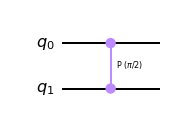

In [33]:
qc=QuantumCircuit(2) #2개의 큐비트를 가진 양자 회로 만들기
qc.cp(pi/2,0,1) #0번 큐비트에 control 큐비트로 지정하며 1번 큐비트를 target 큐비트로 지정하는 CP 게이트를 추가
qc.draw(output="mpl") #양자 회로 시각화

In [34]:
backend = Aer.get_backend('unitary_simulator') #unitary_simulator를 사용하여 시뮬레이션하기

job = execute(qc, backend) #시뮬레이션 실행
result = job.result() #시뮬레이션 결과 가져오기
print(result.get_unitary(qc, decimals=3)) #단일 행렬 출력하기

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [35]:
state12 = execute(qc, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
state12.draw(output="latex") #시뮬레이션 결과를 latex 형식으로 출력하기

<IPython.core.display.Latex object>

###### $|0\rangle$상태의 control 큐비트에 CP-게이트 [Q-sphere]

![cp-gate](./figure/q-sphere_cp-gate.png)

#### target 큐비트와 control 큐비트의 상태가 $|1\rangle$일때 $CP$ 게이트의 작동

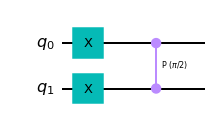

In [36]:
qc=QuantumCircuit(2) #2개의 큐비트를 가진 양자 회로 만들기
qc.x(0) #0번 큐비트에 X 게이트 추가하여 |1> 상태 만들기
qc.x(1) #1번 큐비트에 X 게이트 추가하여 |0> 상태 만들기
qc.cp(pi/2,0,1) #0번 큐비트에 control 큐비트로 지정하며 1번 큐비트를 target 큐비트로 지정하는 CP 게이트를 추가
qc.draw(output="mpl") #양자 회로 시각화

In [37]:
state13 = execute(qc, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
state13.draw(output="latex") #시뮬레이션 결과를 latex 형식으로 출력하기

<IPython.core.display.Latex object>

###### $|1\rangle$상태의 control 큐비트와 target 큐비트에 CP-게이트 [Q-sphere]

![cp-gate2](./figure/q-sphere_cp-gate2.png)

#### 수학적 표현

$$ CPhase = |0\rangle\langle0| \otimes I + |1\rangle\langle1| \otimes P  = \begin{pmatrix} 1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & e^{i\lambda} \end{pmatrix} $$

## SWAP 게이트

SWAP 게이트는 $swap(qubit_0, qubit_0)$과 같은 문법으로 사용이 되며 대상의 두개 큐비트의 상태를 교환합니다. SWAP 게이트는 대칭적인(symmetric) 게이트이며 사실상 qubit_0과 qubit_1이 구분되지 않습니다. 대칭적인 게이트이기 때문에 qubit_0과 qubit_1을 서로 바꿔서 입력하여도 같은 결과를 출력합니다.


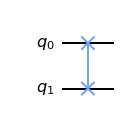

In [38]:
qc=QuantumCircuit(2) #2개의 큐비트를 가진 양자 회로 만들기
qc.swap(0,1) #0번 큐비트를 qubit_0로 지정하며 1번 큐비트를 qubit_1로 지정하여 SWAP 게이트를 추가하기
qc.draw(output="mpl") #양자 회로 시각화

In [39]:
backend = Aer.get_backend('unitary_simulator') #unitary_simulator를 사용하여 시뮬레이션하기

job = execute(qc, backend) #시뮬레이션 실행
result = job.result() #시뮬레이션 결과 가져오기
print(result.get_unitary(qc, decimals=3)) #단일 행렬 출력하기

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [40]:
state14 = execute(qc, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
state14.draw(output="latex") #시뮬레이션 결과를 latex 형식으로 출력하기

<IPython.core.display.Latex object>

#### 0번 큐비트의 상태가 $|1\rangle$일때의 상황

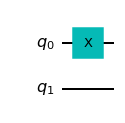

In [41]:
qc=QuantumCircuit(2)
qc.x(0)
qc.draw(output="mpl")

In [42]:
state15 = execute(qc, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
state15.draw(output="latex") #시뮬레이션 결과를 latex 형식으로 출력하기

<IPython.core.display.Latex object>

###### 0번째 큐비트를 $|1\rangle$ 상태로 만들기[Q-sphere]

![swap-gate](./figure/q-sphere_swap-gate.png)

#### SWAP 게이트 추가하여 출력값 확인하기

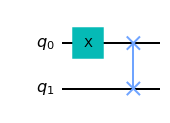

In [43]:
qc=QuantumCircuit(2) #2개의 큐비트를 가진 양자 회로 만들기
qc.x(0) #0번 큐비트에 X 게이트 추가하여 |1> 상태 만들기
qc.swap(0,1) #0번 큐비트를 qubit_0로 지정하며 1번 큐비트를 qubit_1로 지정하여 SWAP 게이트를 추가하기
qc.draw(output="mpl") #양자 회로 시각화

In [44]:
state16 = execute(qc, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
state16.draw(output="latex") #시뮬레이션 결과를 latex 형식으로 출력하기

<IPython.core.display.Latex object>

###### $|1\rangle$상태의 0번째 큐비트와 $|0\rangle$상태의 1번째 큐비트에 SWAP-게이트 [Q-sphere]

![swap-gate2](./figure/q-sphere_swap-gate2.png)

#### 수학적 표현

$$ SWAP =  \begin{pmatrix} 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \end{pmatrix} $$

수학적 표현에 따르면 두개 비트의 상태를 서로 바꿔준다.

$$ |a,b\rangle \rightarrow |b,a\rangle $$

## Controlled Rotations Gate
### 1. CRX 게이트 - Controlled RX gate

CRX 게이트는 $crx(\theta, control, target)$과 같은 문법으로 사용이 되며 control 큐비트의 상태에 따라 target 큐비트의 결과값에 영향을 주는 조건부 게이트입니다. control 큐비트의 상태가 $|1\rangle$이면 target 큐비트에 $RX(\theta)$ 게이트를 실행합니다. 하지만 control 큐비트의 상태가 $|0\rangle$인 경우에는 target 큐비트에 어떠한 변화도 가하지 않습니다.

#### target 큐비트의 상태가 $|0\rangle$일때 $CRX$ 게이트의 작동


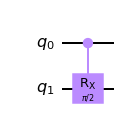

In [45]:
qc=QuantumCircuit(2) #2개의 큐비트를 가진 양자 회로 만들기
qc.crx(pi/2,0,1) #0번 큐비트에 control 큐비트로 지정하며 1번 큐비트를 target 큐비트로 지정하는 CRX 게이트를 추가하기
qc.draw(output="mpl")

In [46]:
backend = Aer.get_backend('unitary_simulator') #unitary_simulator를 사용하여 시뮬레이션하기

job = execute(qc, backend) #시뮬레이션 실행
result = job.result() #시뮬레이션 결과 가져오기
print(result.get_unitary(qc, decimals=3)) #단일 행렬 출력하기

Operator([[ 1.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ],
          [ 0.   +0.j   ,  0.707+0.j   ,  0.   +0.j   ,  0.   -0.707j],
          [-0.   +0.j   ,  0.   -0.j   ,  1.   +0.j   ,  0.   -0.j   ],
          [ 0.   -0.j   ,  0.   -0.707j,  0.   -0.j   ,  0.707-0.j   ]],
         input_dims=(2, 2), output_dims=(2, 2))


In [47]:
state17 = execute(qc, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
state17.draw(output="latex") #시뮬레이션 결과를 latex 형식으로 출력하기

<IPython.core.display.Latex object>

###### $|0\rangle$상태의 control 큐비트에 CRX-게이트 [Q-sphere]

![crx-gate](./figure/q-sphere_crx-gate.png)

#### target 큐비트와 control 큐비트의 상태가 $|1\rangle$일때 $CRX$ 게이트의 작동

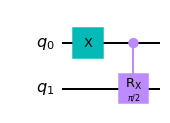

In [48]:
qc=QuantumCircuit(2) #2개의 큐비트를 가진 양자 회로 만들기
qc.x(0) #0번 큐비트에 X 게이트 추가하여 |1> 상태 만들기
qc.crx(pi/2,0,1) #0번 큐비트에 control 큐비트로 지정하며 1번 큐비트를 target 큐비트로 지정하는 CRX 게이트를 추가하기
qc.draw(output="mpl") #양자 회로 시각화


In [49]:
state18 = execute(qc, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
state18.draw(output="latex") #시뮬레이션 결과를 latex 형식으로 출력하기

<IPython.core.display.Latex object>

###### $|1\rangle$상태의 control 큐비트에 CRX-게이트 [Q-sphere]

![crx-gate2](./figure/q-sphere_crx-gate2.png)

#### 수학적 표현

$$ CRX(\theta)_{q_0,q_1} = I \otimes |0\rangle\langle0| + RX(\theta) \otimes |1\rangle\langle1| = \begin{pmatrix} 1 & 0 & 0 & 0 \\
0 & \cos{\frac{\theta}{2}} & 0 & -i\sin{\frac{\theta}{2}} \\ 0 & 0 & 1 & 0 \\ 0 & -i\sin{\frac{\theta}{2}} & 0 & \cos{\frac{\theta}{2}} \end{pmatrix} $$

$$ CRX(\theta_{q_1,q_0} = |0\rangle\langle0| \otimes I + |1\rangle\langle1| \otimes RX(\theta)  = \begin{pmatrix} 1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\ 0 & 0 & \cos{\frac{\theta}{2}} & -i\sin{\frac{\theta}{2}} \\ 0 & 0 & -i\sin{\frac{\theta}{2}} & \cos{\frac{\theta}{2}} \end{pmatrix} $$


### 2. CRY 게이트 - Controlled RY gate

CRY 게이트는 $cry(\theta, control, target)$과 같은 문법으로 사용이 되며 control 큐비트의 상태에 따라 target 큐비트의 결과값에 영향을 주는 조건부 게이트입니다. control 큐비트의 상태가 $|1\rangle$이면 target 큐비트에 $RY(\theta)$ 게이트를 실행합니다. 하지만 control 큐비트의 상태가 $|0\rangle$인 경우에는 target 큐비트에 어떠한 변화도 가하지 않습니다.

#### target 큐비트의 상태가 $|0\rangle$일때 $CRY$ 게이트의 작동

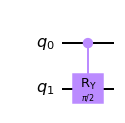

In [50]:
qc=QuantumCircuit(2) #2개의 큐비트를 가진 양자 회로 만들기
qc.cry(pi/2,0,1) #0번 큐비트에 control 큐비트로 지정하며 1번 큐비트를 target 큐비트로 지정하는 CRY 게이트를 추가하기
qc.draw(output="mpl") #양자 회로 시각화

In [51]:
backend = Aer.get_backend('unitary_simulator') #unitary_simulator를 사용하여 시뮬레이션하기

job = execute(qc, backend) #시뮬레이션 실행
result = job.result() #시뮬레이션 결과 가져오기
print(result.get_unitary(qc, decimals=3)) #단일 행렬 출력하기

Operator([[ 1.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.707+0.j,  0.   +0.j, -0.707+0.j],
          [ 0.   +0.j,  0.   +0.j,  1.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.707+0.j,  0.   +0.j,  0.707+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [52]:
state19 = execute(qc, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
state19.draw(output="latex") #시뮬레이션 결과를 latex 형식으로 출력하기

<IPython.core.display.Latex object>

###### $|0\rangle$상태의 control 큐비트에 CRY-게이트 [Q-sphere]

![cry-gate](./figure/q-sphere_cry-gate.png)

#### target 큐비트와 control 큐비트의 상태가 $|1\rangle$일때 $CRY$ 게이트의 작동

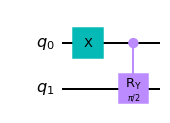

In [53]:
qc=QuantumCircuit(2) #2개의 큐비트를 가진 양자 회로 만들기
qc.x(0) #0번 큐비트에 X 게이트 추가하여 |1> 상태 만들기
qc.cry(pi/2,0,1) #0번 큐비트에 control 큐비트로 지정하며 1번 큐비트를 target 큐비트로 지정하는 CRY 게이트를 추가하기
qc.draw(output="mpl") #양자 회로 시각화

In [54]:
state20 = execute(qc, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
state20.draw(output="latex") #시뮬레이션 결과를 latex 형식으로 출력하기

<IPython.core.display.Latex object>

###### $|1\rangle$상태의 control 큐비트에 CRY-게이트 [Q-sphere]

![cry-gate2](./figure/q-sphere_cry-gate2.png)

#### 수학적 표현

$$ CRY(\theta)_{q_0,q_1} = I \otimes |0\rangle\langle0| + RY(\theta) \otimes |1\rangle\langle1| = \begin{pmatrix} 1 & 0 & 0 & 0 \\
0 & \cos{\frac{\theta}{2}} & 0 & -\sin{\frac{\theta}{2}} \\ 0 & 0 & 1 & 0 \\ 0 & \sin{\frac{\theta}{2}} & 0 & \cos{\frac{\theta}{2}} \end{pmatrix} $$

$$ CRY(\theta)_{q_1,q_0} = |0\rangle\langle0| \otimes I + |1\rangle\langle1| \otimes RY(\theta)  = \begin{pmatrix} 1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\ 0 & 0 & \cos{\frac{\theta}{2}} & -\sin{\frac{\theta}{2}} \\ 0 & 0 & \sin{\frac{\theta}{2}} & \cos{\frac{\theta}{2}} \end{pmatrix} $$


### 3. CRZ 게이트 - Controlled RZ gate

CRZ 게이트는 $crZ(\theta, control, target)$과 같은 문법으로 사용이 되며 control 큐비트의 상태에 따라 target 큐비트의 결과값에 영향을 주는 조건부 게이트입니다. control 큐비트의 상태가 $|1\rangle$이면 target 큐비트에 $RZ(\theta)$ 게이트를 실행합니다. 하지만 control 큐비트의 상태가 $|0\rangle$인 경우에는 target 큐비트에 어떠한 변화도 가하지 않습니다.

#### target 큐비트의 상태가 $|0\rangle$일때 $CRZ$ 게이트의 작동

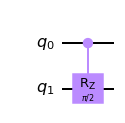

In [55]:
qc=QuantumCircuit(2) #2개의 큐비트를 가진 양자 회로 만들기
qc.crz(pi/2,0,1) #0번 큐비트에 control 큐비트로 지정하며 1번 큐비트를 target 큐비트로 지정하는 CRZ 게이트를 추가하기
qc.draw(output="mpl") #양자 회로 시각화

In [56]:
backend = Aer.get_backend('unitary_simulator') #unitary_simulator를 사용하여 시뮬레이션하기

job = execute(qc, backend) #시뮬레이션 실행
result = job.result() #시뮬레이션 결과 가져오기
print(result.get_unitary(qc, decimals=3)) #단일 행렬 출력하기

Operator([[1.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   ],
          [0.   +0.j   , 0.707-0.707j, 0.   +0.j   , 0.   +0.j   ],
          [0.   +0.j   , 0.   +0.j   , 1.   +0.j   , 0.   +0.j   ],
          [0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.707+0.707j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [57]:
state21 = execute(qc, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
state21.draw(output="latex") #시뮬레이션 결과를 latex 형식으로 출력하기

<IPython.core.display.Latex object>

###### $|0\rangle$상태의 control 큐비트에 CRZ-게이트 [Q-sphere]

![crz-gate](./figure/q-sphere_crz-gate.png)

#### target 큐비트와 control 큐비트의 상태가 $|1\rangle$일때 $CRZ$ 게이트의 작동

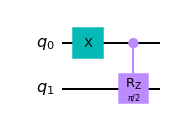

In [58]:
qc=QuantumCircuit(2) #2개의 큐비트를 가진 양자 회로 만들기
qc.x(0) #0번 큐비트에 X 게이트 추가하여 |1> 상태 만들기
qc.crz(pi/2,0,1) #0번 큐비트에 control 큐비트로 지정하며 1번 큐비트를 target 큐비트로 지정하는 CRZ 게이트를 추가하기
qc.draw(output="mpl") #양자 회로 시각화

In [59]:
state22 = execute(qc, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
state22.draw(output="latex") #시뮬레이션 결과를 latex 형식으로 출력하기

<IPython.core.display.Latex object>

###### $|1\rangle$상태의 control 큐비트에 CRZ-게이트 [Q-sphere]

![crz-gate2](./figure/q-sphere_crz-gate2.png)

#### 수학적 표현

$$ CRZ(\theta)_{q_0,q_1} = I \otimes |0\rangle\langle0| + RZ(\theta) \otimes |1\rangle\langle1| = \begin{pmatrix} 1 & 0 & 0 & 0 \\
0 & e^{-i\frac{\lambda}{2}} & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & e^{i\frac{\lambda}{2}} \end{pmatrix} $$

$$ CRZ(\theta)_{q_1,q_0} = |0\rangle\langle0| \otimes I + |1\rangle\langle1| \otimes RZ(\theta)  = \begin{pmatrix} 1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\ 0 & 0 & e^{-i\frac{\lambda}{2}} & 0 \\ 0 & 0 & 0 & e^{i\frac{\lambda}{2}} \end{pmatrix} $$


## 3-큐비트 게이트
### Toffoli Gate - CCX 게이트

Toffoli 게이트는 $ccx(control_0, control_1, target)$과 같은 문법으로 사용이 되며 control_0과 control_1 큐비트의 상태에 따라 target 큐비트의 결과값에 영향을 주는 조건부 게이트입니다. control_0 큐비트와 control_1 큐비트의 상태가 모두 $|1\rangle$이면 target 큐비트에 $X$ 게이트를 실행합니다. 하지만 그 외의 모든 경우에는 target 큐비트에 어떠한 변화도 가하지 않습니다.

#### control_0과 control_1 큐비트의 상태가 모두 $|0\rangle$일때 $Toffoli$ 게이트의 작동

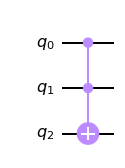

In [60]:
qc=QuantumCircuit(3) #3개의 큐비트를 가진 양자 회로 만들기
qc.ccx(0,1,2) #0번 큐비트에 control_0 큐비트로, 1번 큐비트에 control_1 큐비트로 지정하며 2번 큐비트를 target 큐비트로 지정하는 CCX 게이트를 추가하기
qc.draw(output="mpl") #양자 회로 시각화

In [61]:
backend = Aer.get_backend('unitary_simulator') #unitary_simulator를 사용하여 시뮬레이션하기

job = execute(qc, backend) #시뮬레이션 실행
result = job.result() #시뮬레이션 결과 가져오기 
print(result.get_unitary(qc, decimals=3)) #단일 행렬 출력하기

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


In [62]:
state23 = execute(qc, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
state23.draw(output="latex") #시뮬레이션 결과를 latex 형식으로 출력하기

<IPython.core.display.Latex object>

###### $|0\rangle$상태의 control_0과 control_1 큐비트에 CRZ-게이트 [Q-sphere]

![ccx-gate](./figure/q-sphere_ccx-gate.png)

#### control_0 큐비트와 control_1 큐비트의 상태가 $|1\rangle$일때 $CRZ$ 게이트의 작동

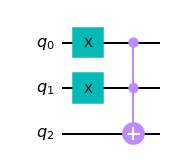

In [63]:
qc=QuantumCircuit(3) #3개의 큐비트를 가진 양자 회로 만들기
qc.x(0) #0번 큐비트에 X 게이트 추가하여 |1> 상태 만들기
qc.x(1) #1번 큐비트에 X 게이트 추가하여 |1> 상태 만들기
qc.ccx(0,1,2) #0번 큐비트에 control_0 큐비트로, 1번 큐비트에 control_1 큐비트로 지정하며 2번 큐비트를 target 큐비트로 지정하는 CCX 게이트를 추가하기
qc.draw(output="mpl") #양자 회로 시각화

In [64]:
state24 = execute(qc, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
state24.draw(output="latex") #시뮬레이션 결과를 latex 형식으로 출력하기

<IPython.core.display.Latex object>

###### $|1\rangle$상태의 control_0과 control_1 큐비트에 CRZ-게이트 [Q-sphere]

![ccx-gate2](./figure/q-sphere_ccx-gate2.png)

#### 그 외 경우의 $CCX$ 게이트의 작동


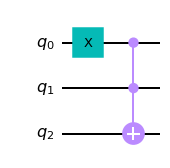

In [65]:
qc=QuantumCircuit(3) #3개의 큐비트를 가진 양자 회로 만들기
qc.x(0) #0번 큐비트에 X 게이트 추가하여 |1> 상태 만들기
qc.ccx(0,1,2) #0번 큐비트에 control_0 큐비트로, 1번 큐비트에 control_1 큐비트로 지정하며 2번 큐비트를 target 큐비트로 지정하는 CCX 게이트를 추가하기
qc.draw(output="mpl") #양자 회로 시각화

In [66]:
state25 = execute(qc, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
state25.draw(output="latex") #시뮬레이션 결과를 latex 형식으로 출력하기

<IPython.core.display.Latex object>

![ccx-gate3](./figure/q-sphere_ccx-gate3.png)


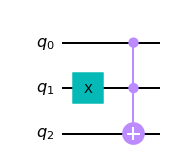

In [67]:
qc=QuantumCircuit(3) #3개의 큐비트를 가진 양자 회로 만들기
qc.x(1) #1번 큐비트에 X 게이트 추가하여 |1> 상태 만들기
qc.ccx(0,1,2) #0번 큐비트에 control_0 큐비트로, 1번 큐비트에 control_1 큐비트로 지정하며 2번 큐비트를 target 큐비트로 지정하는 CCX 게이트를 추가하기
qc.draw(output="mpl") #양자 회로 시각화

In [68]:
state26 = execute(qc, StatevectorSimulator()).result().get_statevector() # 시뮬레이션에 양자회로를 넣어 실행시키기
state26.draw(output="latex") #시뮬레이션 결과를 latex 형식으로 출력하기

<IPython.core.display.Latex object>

![ccx-gate4](./figure/q-sphere_ccx-gate4.png)

#### 수학적 표현

$$ CCX_{q_0,q_1,q_2} = I \otimes I \otimes |0\rangle\langle0| + CX \otimes |1\rangle\langle1| = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0
\end{pmatrix} $$

$$ CCX_{q_2,q_1,q_0} = |0\rangle\langle0|  \otimes I \otimes I + |1\rangle\langle1| \otimes CX  = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0
\end{pmatrix} $$

In [69]:
import qiskit.tools.jupyter
%qiskit_version_table #qiskit 버전 표시하기